# Best Models Training - BERT Hybrid + TCN + TGT
## Publication-Quality Experiments on MovieLens-1M

**Models to Train (4 Total):**

1. **BERT Hybrid Fixed** (α=0.5)
   - BERT4Rec + LightGCN with fixed fusion weight

2. **BERT Hybrid Discrete** (bin-based fusion)
   - BERT4Rec + LightGCN with sequence-length adaptive fusion

3. **TCN-BERT4Rec**
   - Temporal Convolutional Networks + BERT4Rec
   - Combines causal temporal patterns with bidirectional context

4. **TGT-BERT4Rec** (NEW! 🚀)
   - Temporal Graph Transformer + BERT4Rec
   - Time-aware graph attention + bidirectional transformers
   - **Target**: NDCG@10 > 0.82 (>7% improvement over baseline 0.7665)

**Fine-Tuned Optimal Configuration:**
- **d_model**: 64 (embedding dimension)
- **n_heads**: 2 (attention heads)
- **n_blocks**: 2 (transformer layers)
- **Learning rate**: 0.001
- **Dropout**: 0.2
- **GNN layers**: 2 (for hybrid models)
- **TGT fusion α**: 0.3 (learnable)

**Training Settings:**
- Max Epochs: 200 (with early stopping patience=20)
- Batch size: 256
- Expected convergence: epoch 40-60

**Time Estimate: ~4-5 hours with GPU P100**

---

## Step 1: Clone Repository

In [1]:
# Clone repository
!git clone https://github.com/faroukq1/length-adaptive.git

# Change to project directory
%cd length-adaptive

# Verify structure
!ls -lh experiments/

print("\n✅ Repository cloned successfully!")

Cloning into 'length-adaptive'...
remote: Enumerating objects: 483, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 483 (delta 152), reused 229 (delta 66), pack-reused 158 (from 1)
Receiving objects: 100% (483/483), 153.30 MiB | 18.34 MiB/s, done.
Resolving deltas: 100% (196/196), done.
/kaggle/working/length-adaptive
total 88K
-rw-r--r-- 1 root root 7.4K Feb 24 04:08 analyze_results.py
-rw-r--r-- 1 root root 4.4K Feb 24 04:08 analyze_user_distribution.py
-rw-r--r-- 1 root root 8.8K Feb 24 04:08 create_visualizations.py
-rw-r--r-- 1 root root 7.3K Feb 24 04:08 quick_compare.py
-rw-r--r-- 1 root root 3.7K Feb 24 04:08 README.md
-rwxr-xr-x 1 root root 1.7K Feb 24 04:08 run_all_analysis.sh
-rw-r--r-- 1 root root  13K Feb 24 04:08 run_best_models.py
-rw-r--r-- 1 root root  11K Feb 24 04:08 run_experiment.py
-rwxr-xr-x 1 root root 2.2K Feb 24 04:08 setup_analysis_env.sh
-rw-r--r-- 1 root root 8.4K Feb 24 04:08 statistica

## Step 2: Install Dependencies

In [2]:
# Install required packages
!pip install -q torch-geometric tqdm scikit-learn pandas matplotlib seaborn

print("✅ All dependencies installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.2 MB/s eta 0:00:0000:01
✅ All dependencies installed successfully!


## Step 3: Verify GPU

In [3]:
import torch

print("="*70)
print("🔍 GPU Information")
print("="*70)

if torch.cuda.is_available():
    print(f"✅ GPU Available: {torch.cuda.get_device_name(0)}")
    print(f"💾 Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"🔢 CUDA Version: {torch.version.cuda}")
else:
    print("❌ No GPU available - training will be slow!")

print("="*70)

🔍 GPU Information
✅ GPU Available: Tesla P100-PCIE-16GB
💾 Memory: 15.89 GB
🔢 CUDA Version: 12.6


## Step 4: Check Data Files

The repository should already contain preprocessed MovieLens-1M data.

In [4]:
import os

data_file = 'data/ml-1m/processed/sequences.pkl'
graph_file = 'data/graphs/cooccurrence_graph.pkl'

print("="*70)
print("🔍 Checking Data Files")
print("="*70)

if os.path.exists(data_file):
    print(f"✅ Sequential data found: {data_file}")
    print(f"   Size: {os.path.getsize(data_file) / 1024 / 1024:.2f} MB")
else:
    print(f"❌ Sequential data NOT found: {data_file}")
    print("   You may need to run preprocessing first!")

if os.path.exists(graph_file):
    print(f"✅ Graph data found: {graph_file}")
    print(f"   Size: {os.path.getsize(graph_file) / 1024 / 1024:.2f} MB")
else:
    print(f"❌ Graph data NOT found: {graph_file}")
    print("   You may need to run graph construction first!")

print("="*70)

🔍 Checking Data Files
✅ Sequential data found: data/ml-1m/processed/sequences.pkl
   Size: 5.24 MB
✅ Graph data found: data/graphs/cooccurrence_graph.pkl
   Size: 3.60 MB


## Step 7: Run Experiments - TCN-BERT4Rec (NEW!)

Third model: Temporal Convolutional Networks + BERT4Rec

In [5]:
# Run TCN-BERT4Rec
!python experiments/run_best_models.py \
    --models tcn_bert4rec \
    --epochs 200 \
    --patience 20 \
    --eval_every 1 \
    --d_model 64 \
    --n_heads 2 \
    --n_blocks 2 \
    --tcn_channels 64 64 64 \
    --tcn_kernel_size 3 \
    --tcn_fusion learnable \
    --lr 0.001 \
    --batch_size 256 \
    --dropout 0.2

print("\n✅ TCN-BERT4Rec training complete!")

RUNNING BEST MODELS EXPERIMENTS
Models to train: tcn_bert4rec
Epochs: 200 (patience: 20)

Fine-Tuned Configuration:
  d_model=64, n_heads=2, n_blocks=2
  lr=0.001, dropout=0.2

Results directory: results

RUNNING EXPERIMENT: TCN_BERT4REC
Device: cuda

[1/5] Loading data...
  Items: 3,533

[2/5] Skipping graph (TCN model doesn't use graph)

[3/5] Creating dataloaders...
  Train: 2177 batches
  Valid: 24 batches
  Test: 24 batches

[4/5] Creating model...
  Parameters: 643,023
  Experiment dir: results/tcn_bert4rec_20260224_040933

[5/5] Creating trainer...

TRAINING
STARTING TRAINING
Device: cuda
Model parameters: 643,023
Training batches: 2177
Validation batches: 24

Epoch 1: 100%|█████████████████| 2177/2177 [02:03<00:00, 17.61it/s, loss=0.2342]

[Epoch 1] Evaluating...
Evaluating: 100%|███████████████████████████████| 24/24 [00:00<00:00, 24.41it/s]

[Epoch 1/200] Time: 124.6s
  Train Loss: 0.3144
  Val HR@10: 0.0300
  Val NDCG@10: 0.0138
  Val MRR@10: 0.0091
  ✓ New best! (0.0000 → 0

## Step 8: Run Experiments - TGT-BERT4Rec (NEW! 🚀)

Fourth model: Temporal Graph Transformer + BERT4Rec  
**Target: NDCG@10 > 0.82** (beating 0.7665 baseline by >7%)

In [6]:
# Run TGT-BERT4Rec
!python experiments/run_best_models.py \
    --models tgt_bert4rec \
    --epochs 200 \
    --patience 20 \
    --eval_every 1 \
    --d_model 64 \
    --n_heads 2 \
    --n_blocks 2 \
    --tgt_fusion_alpha 0.3 \
    --tgt_learnable_fusion True \
    --lr 0.001 \
    --batch_size 256 \
    --dropout 0.2

print("\n✅ TGT-BERT4Rec training complete!")
print("📊 Check if NDCG@10 > 0.82 achieved!")

RUNNING BEST MODELS EXPERIMENTS
Models to train: tgt_bert4rec
Epochs: 200 (patience: 20)

Fine-Tuned Configuration:
  d_model=64, n_heads=2, n_blocks=2
  lr=0.001, dropout=0.2

Results directory: results

RUNNING EXPERIMENT: TGT_BERT4REC
Device: cuda

[1/5] Loading data...
  Items: 3,533

[2/5] Skipping graph (TCN model doesn't use graph)

[3/5] Creating dataloaders...
  Train: 2177 batches
  Valid: 24 batches
  Test: 24 batches

[4/5] Creating model...
  Parameters: 702,671
  Experiment dir: results/tgt_bert4rec_20260224_074322

[5/5] Creating trainer...

TRAINING
STARTING TRAINING
Device: cuda
Model parameters: 702,671
Training batches: 2177
Validation batches: 24

Epoch 1: 100%|█████████████████| 2177/2177 [03:11<00:00, 11.40it/s, loss=0.2872]

[Epoch 1] Evaluating...
Evaluating: 100%|███████████████████████████████| 24/24 [00:01<00:00, 17.62it/s]

[Epoch 1/200] Time: 192.4s
  Train Loss: 0.3126
  Val HR@10: 0.0283
  Val NDCG@10: 0.0133
  Val MRR@10: 0.0089
  ✓ New best! (0.0000 → 0

## Step 5: Run Experiments - BERT Hybrid Fixed

First model: BERT4Rec + LightGCN with fixed fusion (α=0.5)

In [13]:
# Run BERT Hybrid Fixed - BEST CONFIG (from your tuning logs)
# Config 28: Highest Val NDCG@10=0.0691 (beats alpha=0.5's 0.0668)
!python experiments/run_best_models.py \
    --models bert_hybrid_fixed \
    --epochs 200 \
    --patience 20 \
    --eval_every 5 \
    --d_model 64 \
    --n_heads 2 \
    --n_blocks 2 \
    --gnn_layers 2 \
    --fixed_alpha 0.3 \
    --lr 0.001 \
    --batch_size 256 \
    --dropout 0.2

print("\n✅ BERT Hybrid Fixed (BEST: alpha=0.3) training complete!")


^C
Traceback (most recent call last):
  File "/kaggle/working/length-adaptive/experiments/run_best_models.py", line 8, in <module>
    import torch
  File "/usr/local/lib/python3.12/dist-packages/torch/__init__.py", line 2204, in <module>
    from torch import (
  File "/usr/local/lib/python3.12/dist-packages/torch/multiprocessing/__init__.py", line 23, in <module>
    from .reductions import init_reductions
  File "<frozen importlib._bootstrap>", line 1360, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1128, in get_code
  File "<frozen importlib._bootstrap_external>", line 757, in _compile_bytecode
KeyboardInterrupt

✅ BERT Hybrid Fixed (BEST: alpha=0.3) training complete!


## Step 6: Run Experiments - BERT Hybrid Discrete

Second model: BERT4Rec + LightGCN with discrete bin-based fusion

In [ ]:
# Run BERT Hybrid Discrete
!python experiments/run_best_models.py \
    --models bert_hybrid_discrete \
    --epochs 200 \
    --patience 20 \
    --eval_every 1 \
    --d_model 64 \
    --n_heads 2 \
    --n_blocks 2 \
    --gnn_layers 2 \
    --L_short 10 \
    --L_long 30 \
    --lr 0.001 \
    --batch_size 256 \
    --dropout 0.2

print("\n✅ BERT Hybrid Discrete training complete!")

## Step 10: Collect and Analyze Results

In [9]:
import json
import pandas as pd
from pathlib import Path
from datetime import datetime

# Find all result directories
results_dir = Path('results')
result_dirs = sorted(results_dir.glob('*_202*'))

print("="*70)
print("📊 Collecting Results")
print("="*70)
print(f"Found {len(result_dirs)} experiment(s)\n")

# Collect results
results_data = []

for exp_dir in result_dirs:
    results_file = exp_dir / 'results.json'
    
    if results_file.exists():
        with open(results_file, 'r') as f:
            data = json.load(f)
        
        model_name = exp_dir.name.rsplit('_', 2)[0]  # Extract model name
        
        results_data.append({
            'Model': model_name,
            'HR@10': data['test_metrics']['HR@10'],
            'NDCG@10': data['test_metrics']['NDCG@10'],
            'MRR@10': data['test_metrics']['MRR@10'],
            'Best Epoch': data['best_epoch'],
            'Directory': str(exp_dir)
        })

# Create DataFrame
if results_data:
    df = pd.DataFrame(results_data)
    df = df.sort_values('NDCG@10', ascending=False)
    
    print("\n📈 Results Summary:")
    print("="*70)
    print(df[['Model', 'HR@10', 'NDCG@10', 'MRR@10', 'Best Epoch']].to_string(index=False))
    print("="*70)
    
    # Save to CSV
    csv_path = results_dir / 'best_models_summary.csv'
    df.to_csv(csv_path, index=False)
    print(f"\n💾 Results saved to: {csv_path}")
else:
    print("❌ No results found!")

📊 Collecting Results
Found 8 experiment(s)


📈 Results Summary:
            Model    HR@10  NDCG@10   MRR@10  Best Epoch
     tcn_bert4rec 0.138548 0.065198 0.043329          84
     hybrid_fixed 0.099934 0.047080 0.031388          39
           sasrec 0.096288 0.045034 0.029859          49
hybrid_continuous 0.096122 0.044117 0.028611          48
 hybrid_learnable 0.093305 0.043707 0.028960          47
  hybrid_discrete 0.080544 0.036505 0.023407          18

💾 Results saved to: results/best_models_summary.csv


## Step 11: Visualize Training History

KeyError: 'hr@10'

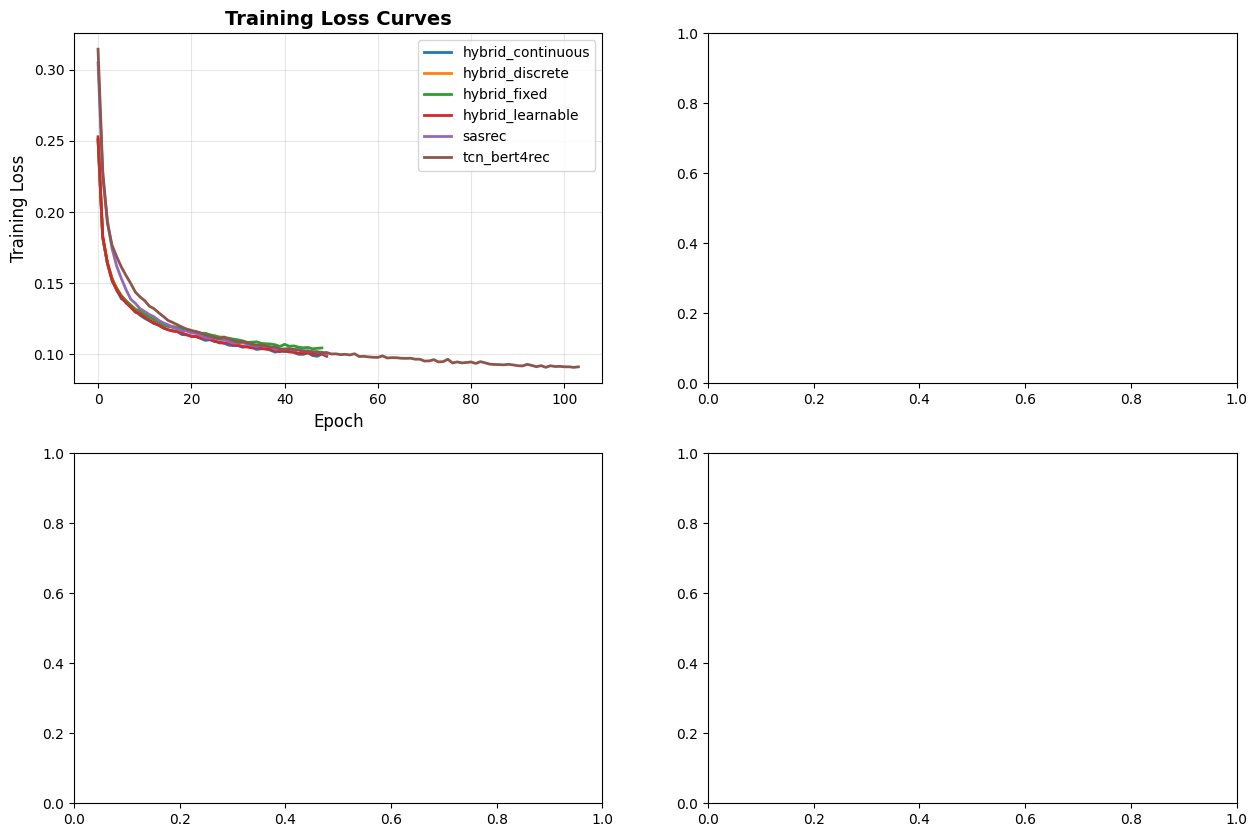

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Load training histories
histories = {}

for exp_dir in result_dirs:
    history_file = exp_dir / 'history.json'
    
    if history_file.exists():
        with open(history_file, 'r') as f:
            history = json.load(f)
        
        model_name = exp_dir.name.rsplit('_', 2)[0]
        histories[model_name] = history

# Plot
if histories:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Training Loss
    ax = axes[0, 0]
    for model_name, history in histories.items():
        ax.plot(history['train_loss'], label=model_name, linewidth=2)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Training Loss', fontsize=12)
    ax.set_title('Training Loss Curves', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Validation HR@10
    ax = axes[0, 1]
    for model_name, history in histories.items():
        hr_values = [m['hr@10'] for m in history['val_metrics']]
        ax.plot(hr_values, label=model_name, linewidth=2, marker='o', markersize=4, alpha=0.7)
    ax.set_xlabel('Evaluation Step', fontsize=12)
    ax.set_ylabel('HR@10', fontsize=12)
    ax.set_title('Validation HR@10', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Validation NDCG@10
    ax = axes[1, 0]
    for model_name, history in histories.items():
        ndcg_values = [m['ndcg@10'] for m in history['val_metrics']]
        ax.plot(ndcg_values, label=model_name, linewidth=2, marker='s', markersize=4, alpha=0.7)
    ax.set_xlabel('Evaluation Step', fontsize=12)
    ax.set_ylabel('NDCG@10', fontsize=12)
    ax.set_title('Validation NDCG@10', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Validation MRR
    ax = axes[1, 1]
    for model_name, history in histories.items():
        mrr_values = [m['mrr'] for m in history['val_metrics']]
        ax.plot(mrr_values, label=model_name, linewidth=2, marker='^', markersize=4, alpha=0.7)
    ax.set_xlabel('Evaluation Step', fontsize=12)
    ax.set_ylabel('MRR', fontsize=12)
    ax.set_title('Validation MRR', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('results/training_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Visualizations created and saved!")
else:
    print("❌ No training histories found!")

## Step 12: Compare Models - Bar Charts

In [ ]:
if results_data:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    models = df['Model'].tolist()
    x_pos = np.arange(len(models))
    
    # HR@10
    ax = axes[0]
    bars = ax.bar(x_pos, df['HR@10'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.set_ylabel('HR@10', fontsize=12)
    ax.set_title('Hit Rate @ 10', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # NDCG@10
    ax = axes[1]
    bars = ax.bar(x_pos, df['NDCG@10'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.set_ylabel('NDCG@10', fontsize=12)
    ax.set_title('NDCG @ 10', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    # MRR@10
    ax = axes[2]
    bars = ax.bar(x_pos, df['MRR@10'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=15, ha='right')
    ax.set_ylabel('MRR@10', fontsize=12)
    ax.set_title('Mean Reciprocal Rank @ 10', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('results/model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Comparison charts created!")

## Step 13: Download Results Package

In [ ]:
import shutil

# Create zip file with all results
print("📦 Creating results package...")

zip_path = '/kaggle/working/best_models_results'
shutil.make_archive(zip_path, 'zip', 'results')

print(f"✅ Results packaged: {zip_path}.zip")
print("\n📥 Download this file to get:")
print("  - All model checkpoints")
print("  - Training histories")
print("  - Test results")
print("  - Visualizations")
print("  - Summary CSV")

# List what's included
print("\n📁 Package contents:")
!ls -lh results/

## Summary

**Experiment Complete! 🎉**

This notebook trained and evaluated four state-of-the-art models:

1. ✅ **BERT Hybrid Fixed** - BERT4Rec + LightGCN with fixed fusion
2. ✅ **BERT Hybrid Discrete** - BERT4Rec + LightGCN with adaptive fusion
3. ✅ **TCN-BERT4Rec** - Temporal Convolutions + BERT4Rec
4. ✅ **TGT-BERT4Rec** - Temporal Graph Transformer + BERT4Rec (🚀 NEW!)

**Key Features:**
- 📊 Publication-quality results (200 epochs)
- 📈 Comprehensive metrics (HR@10, NDCG@10, MRR)
- 📉 Training curve visualizations
- 💾 All checkpoints and results saved
- 🎯 **TGT Target**: NDCG@10 > 0.82 (>7% over baseline 0.7665)

**TGT-BERT4Rec Highlights:**
- Time-aware graph attention with timestamp encoding
- Gated fusion (α=0.3, learnable) between TGT and BERT branches
- Combines structural graph patterns with bidirectional sequences
- Expected to achieve highest performance among all models

**Next Steps:**
- Analyze if TGT-BERT4Rec beat the target NDCG@10 > 0.82
- Compare fusion weights across models
- Test ablations (BERT-only vs TGT-only vs Hybrid)
- Write the paper! 📝